In [79]:
from pyomo.environ import *
from pyomo.dae import *
import numpy as np

model = ConcreteModel()

At1 = np.pi*(2.54*1.75/2)**2
At2 = np.pi*(2.54*1.75/2)**2

Ao1 = np.pi*(2.54*(3/16)/2)**2
Ao2 = np.pi*(2.54*(3/16)/2)**2

L1max = 25
L2max = 25

model.t = ContinuousSet(bounds=(0,120))
model.h = Var([1,2], model.t, bounds=(0,25))
model.u = Var(model.t, bounds=(0,12))

model.dh = DerivativeVar(model.h)

model.

In [74]:

model.umax = Var(bounds=(10,100))

model.dh = DerivativeVar(model.h)

model.obj = Objective(expr=model.umax,sense=minimize)

def _ode(model,i):
    if i == 0:
        return Constraint.Skip
    return model.dh[i] == model.u[i]/model.area['B'](model.h[i])
model.ode = Constraint(model.t, rule=_ode)

model.maxu = Constraint(model.t, rule=lambda model,i:model.u[i] <= model.umax)

def _init(model):
    yield model.h[0] == 0
    yield model.h[10] == 10
model.init = ConstraintList(rule=_init)

discretizer = TransformationFactory('dae.finite_difference')
discretizer.apply_to(model,nfe=50,scheme='BACKWARD')
 
solver = SolverFactory('ipopt')
solver.solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 153
  Number of variables: 153
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.044271230697631836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


26.12215709334236


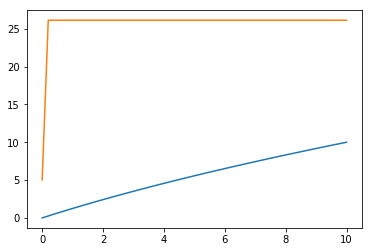

In [75]:
print(model.umax())

t = [i for i in model.t]
h = [model.h[i]() for i in model.h]
u = [model.u[i]() for i in model.u]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t,h,t,u)